<a href="https://colab.research.google.com/github/Gopika-C/New-Project/blob/main/sampleminiproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
#from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd


'/content'

In [ ]:
ds=pd.read_csv(r'/content/drive/MyDrive/Mini Project/dataset.csv')

In [ ]:
sd=pd.read_csv(r'/content/drive/MyDrive/Mini Project/Data (2).csv')

In [ ]:
sd.dtypes


timestamp                                int64
title                                   object
severity                                 int64
tags/0                                  object
tags/1                                  object
data/0/Host                             object
data/0/Subject Username                 object
data/0/Target Username                  object
data/0/Logon Type                      float64
data/0/Subject Workstation              object
data/0/Subject User SID                 object
data/0/Target User SID                  object
data/0/Target Domain Name               object
watchlist                                int64
category                                object
assigned_to                              int64
alertId                                  int64
state                                   object
@timestamp                              object
data/0/id                               object
data/0/index                            object
data/0/@times

In [ ]:
ds.head()

,modload_count,process_path,alert_type,sensor_criticality,@timestamp,report_score,watchlist_id,sensor_id,feed_name,created_time,...,total_hosts,feed_id,status,os_type,@version,childproc_count,unique_id,feed_rating,Unnamed: 47,Unnamed: 48
0,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.856Z,40,CVE-2016-4171,322,nvd,2019-11-29T12:11:06.587Z,...,198,18,Unresolved,windows,1,2,c9845596-2a1c-40fa-ba73-1a3cb250e988,3,NaN,NaN
1,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.856Z,40,CVE-2016-4181,322,nvd,2019-11-29T12:11:06.589Z,...,198,18,Unresolved,windows,1,2,a3e78117-f02b-4a58-9194-39b8c153b1fb,3,NaN,NaN
2,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.856Z,40,CVE-2016-4138,322,nvd,2019-11-29T12:11:06.413Z,...,198,18,Unresolved,windows,1,2,cf8a47c0-fe5e-4738-a0c4-841c04bd4e85,3,NaN,NaN
3,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.856Z,40,CVE-2016-4128,322,nvd,2019-11-29T12:11:06.406Z,...,198,18,Unresolved,windows,1,2,9c819b01-6e5c-4985-92a6-132c98cb6f63,3,NaN,NaN
4,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.856Z,40,CVE-2016-4227,322,nvd,2019-11-29T12:11:06.41Z,...,198,18,Unresolved,windows,1,2,7cbfe316-3569-4a6b-8b30-efd474b13cc6,3,NaN,NaN


In [ ]:
print(ds)

      modload_count                                       process_path  \
0                 2  c:\windows\syswow64\macromed\flash\flashplayer...   
1                 2  c:\windows\syswow64\macromed\flash\flashplayer...   
2                 2  c:\windows\syswow64\macromed\flash\flashplayer...   
3                 2  c:\windows\syswow64\macromed\flash\flashplayer...   
4                 2  c:\windows\syswow64\macromed\flash\flashplayer...   
...             ...                                                ...   
2495              1  c:\windows\syswow64\macromed\flash\flashplayer...   
2496              1  c:\windows\syswow64\macromed\flash\flashplayer...   
2497             45  c:\program files\malwarebytes\anti-malware\mba...   
2498              1  c:\windows\syswow64\macromed\flash\flashplayer...   
2499              1  c:\windows\syswow64\macromed\flash\flashplayer...   

                         alert_type sensor_criticality  \
0     watchlist.hit.ingress.process                  

In [ ]:
ds.describe()

,modload_count,Unnamed: 48
count,2500.00000,9.0
mean,7.68920,3.0
std,25.38073,0.0
min,0.00000,3.0
25%,2.00000,3.0
50%,2.00000,3.0
75%,2.00000,3.0
max,278.00000,3.0


In [ ]:
ds.keys()

Index(['modload_count', 'process_path', 'alert_type', 'sensor_criticality',
       '@timestamp', 'report_score', 'watchlist_id', 'sensor_id', 'feed_name',
       'created_time', 'report_ignored', 'message', 'crossproc_count',
       'ioc_confidence', 'ioc_type', 'alert_severity', 'watchlist_name',
       'group', 'hostname', 'filemod_count', 'comms_ip', 'regmod_count',
       'sha256', 'username', 'observed_hosts', 'ioc_value', 'description',
       'tags', 'process_name', 'process_unique_id', 'host', 'process_id',
       'link', '_version_', 'path', 'netconn_count', 'md5', 'interface_ip',
       'segment_id', 'total_hosts', 'feed_id', 'status', 'os_type', '@version',
       'childproc_count', 'unique_id', 'feed_rating', 'Unnamed: 47',
       'Unnamed: 48'],
      dtype='object')

In [ ]:
ds.shape

(2500, 49)

In [ ]:
ds.dtypes

modload_count           int64
process_path           object
alert_type             object
sensor_criticality     object
@timestamp             object
report_score           object
watchlist_id           object
sensor_id              object
feed_name              object
created_time           object
report_ignored         object
message                object
crossproc_count        object
ioc_confidence         object
ioc_type               object
alert_severity         object
watchlist_name         object
group                  object
hostname               object
filemod_count          object
comms_ip               object
regmod_count           object
sha256                 object
username               object
observed_hosts         object
ioc_value              object
description            object
tags                   object
process_name           object
process_unique_id      object
host                   object
process_id             object
link                   object
_version_ 

In [ ]:
new_dataset=ds[['modload_count','process_path','sensor_criticality','alert_type','@timestamp','watchlist_id','tags','report_score','alert_severity']]

In [ ]:
new_dataset

,modload_count,process_path,sensor_criticality,alert_type,@timestamp,watchlist_id,tags,report_score,alert_severity
0,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4171,['carbonblack'],40,27
1,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4181,['carbonblack'],40,27
2,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4138,['carbonblack'],40,27
3,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4128,['carbonblack'],40,27
4,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4227,['carbonblack'],40,27
...,...,...,...,...,...,...,...,...,...
2495,1,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-27T03:12:01.144Z,CVE-2016-0972,['carbonblack'],40,27
2496,1,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-27T03:12:01.144Z,CVE-2016-0995,['carbonblack'],40,27
2497,45,c:\program files\malwarebytes\anti-malware\mba...,3,watchlist.hit.ingress.process,2019-11-27T03:12:01.143Z,41c6ada7-e38a-420b-9767-4d7f3bee947a,['carbonblack'],80,54
2498,1,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-27T03:12:01.143Z,CVE-2016-1031,['carbonblack'],40,27


In [ ]:
new_dataset.dtypes

modload_count          int64
process_path          object
sensor_criticality    object
alert_type            object
@timestamp            object
watchlist_id          object
tags                  object
report_score          object
alert_severity        object
dtype: object

In [ ]:

from sklearn.preprocessing  import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder=LabelEncoder()
new_dataset['process_path']=label_encoder.fit_transform(new_dataset['process_path'].astype(str))
new_dataset['sensor_criticality']=label_encoder.fit_transform(new_dataset['sensor_criticality'].astype(str))
new_dataset['alert_type']=label_encoder.fit_transform(new_dataset['alert_type'].astype(str))
new_dataset['@timestamp']=label_encoder.fit_transform(new_dataset['@timestamp'].astype(str))
new_dataset['watchlist_id']=label_encoder.fit_transform(new_dataset['watchlist_id'].astype(str))
new_dataset['tags']=label_encoder.fit_transform(new_dataset['tags'].astype(str))
new_dataset['report_score']=label_encoder.fit_transform(new_dataset['report_score'].astype(str))
new_dataset['alert_severity']=label_encoder.fit_transform(new_dataset['alert_severity'].astype(str))


NameError: ignored

In [ ]:
new_dataset.dtypes

modload_count         int64
process_path          int64
sensor_criticality    int64
alert_type            int64
@timestamp            int64
watchlist_id          int64
tags                  int64
report_score          int64
alert_severity        int64
dtype: object

In [ ]:
new_dataset.loc[(new_dataset['alert_severity'] >=10) & (new_dataset['alert_severity'] < 30), 'class'] = "LowRisk" 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
new_dataset.loc[(new_dataset['alert_severity'] >=30) & (new_dataset['alert_severity'] < 55), 'class'] = "MediumRisk" 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
new_dataset.loc[(new_dataset['alert_severity'] >=55) & (new_dataset['alert_severity'] < 75), 'class'] = "AverageRisk" 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
new_dataset.loc[(new_dataset['alert_severity'] >=75) & (new_dataset['alert_severity'] < 100), 'class'] = "HighRisk" 

In [ ]:
new_dataset

,modload_count,process_path,sensor_criticality,alert_type,@timestamp,watchlist_id,tags,report_score,alert_severity,class
0,2,27,62,1,398,87,77,20,4,NaN
1,2,27,62,1,398,89,77,20,4,NaN
2,2,27,62,1,398,84,77,20,4,NaN
3,2,27,62,1,398,83,77,20,4,NaN
4,2,27,62,1,398,92,77,20,4,NaN
...,...,...,...,...,...,...,...,...,...,...
2495,1,27,62,1,1,72,77,20,4,NaN
2496,1,27,62,1,1,74,77,20,4,NaN
2497,45,7,62,1,0,17,77,26,9,NaN
2498,1,27,62,1,0,81,77,20,4,NaN


In [ ]:
new_dataset['class']=label_encoder.fit_transform(new_dataset['class'].astype(str))

NameError: ignored

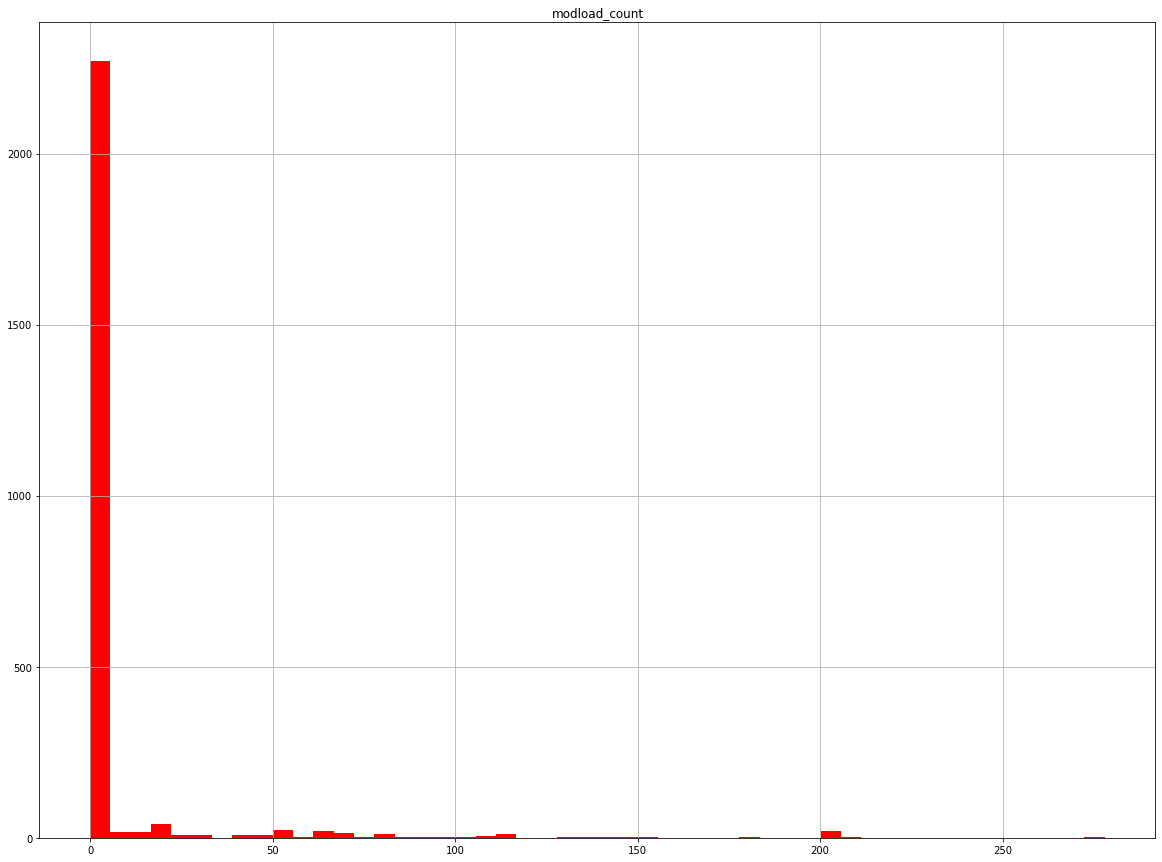

In [ ]:
import matplotlib.pyplot as plt
new_dataset.hist(bins=50,figsize=(20,15),color='r')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x=new_dataset.iloc[:,:-1].values
y=new_dataset.iloc[:,1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train)
print(x_test)

[[2
  'c:\\windows\\syswow64\\macromed\\flash\\flashplayerupdateservice.exe'
  '3' ... 'CVE-2016-0995' "['carbonblack']" '40']
 [1
  'c:\\windows\\syswow64\\macromed\\flash\\flashplayerupdateservice.exe'
  '3' ... 'CVE-2016-4181' "['carbonblack']" '40']
 [2
  'c:\\windows\\syswow64\\macromed\\flash\\flashplayerupdateservice.exe'
  '3' ... 'CVE-2016-4227' "['carbonblack']" '40']
 ...
 [2
  'c:\\windows\\syswow64\\macromed\\flash\\flashplayerupdateservice.exe'
  '3' ... 'CVE-2016-4171' "['carbonblack']" '40']
 [2
  'c:\\windows\\syswow64\\macromed\\flash\\flashplayerupdateservice.exe'
  '3' ... 'CVE-2016-4138' "['carbonblack']" '40']
 [2
  'c:\\windows\\syswow64\\macromed\\flash\\flashplayerupdateservice.exe'
  '3' ... 'CVE-2016-4174' "['carbonblack']" '40']]
[[2
  'c:\\windows\\syswow64\\macromed\\flash\\flashplayerupdateservice.exe'
  '3' ... 'CVE-2016-4115' "['carbonblack']" '28']
 [2
  'c:\\windows\\syswow64\\macromed\\flash\\flashplayerupdateservice.exe'
  '3' ... 'CVE-2015-7654' "[

In [ ]:
from sklearn import preprocessing
#from sklearn.preprocessing import standardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(new_dataset)
X_std=sc.transform(new_dataset)

#applying the Kmeans 

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_std)
kmeans.labels_
print("\ncluster centers:")

print(kmeans.cluster_centers_)

ValueError: ignored

In [ ]:
#applying the support vector machine
from sklearn.svm import SVR
model=SVR()
model.fit(x_train,y_train)
pred=model.predict(x_test)
acc=model.score(x_test,y_test)
print(acc)

ValueError: ignored